# Student Performance - Implementação de Regressão Linear

--------------------------------------------------------------------------------------------------------------------------------
__Objetivo:__ Através do dataset __"Student Performance"__, erá construído um modelo de regressão linear que possa realizar a previsão da performance dos estudantes

In [1]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [26]:
# Carregando o dataset

df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [11]:
# Informações do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [27]:
# Transformação da variável categórica "Extracurricular Activities" para uma variável numérica

df['Extracurricular Activities'] = df['Extracurricular Activities'].map({"Yes": 1, "No": 0})
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [31]:
# Estatísticas descritivas do dataset

df.describe().round(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,4.99,69.45,0.49,6.53,4.58,55.22
std,2.59,17.34,0.50,1.70,2.87,19.21
min,1.00,40.00,0.00,4.00,0.00,10.00
25%,3.00,54.00,0.00,5.00,2.00,40.00
50%,5.00,69.00,0.00,7.00,5.00,55.00
75%,7.00,85.00,1.00,8.00,7.00,71.00
max,9.00,99.00,1.00,9.00,9.00,100.00


<Axes: xlabel='Performance Index', ylabel='Count'>

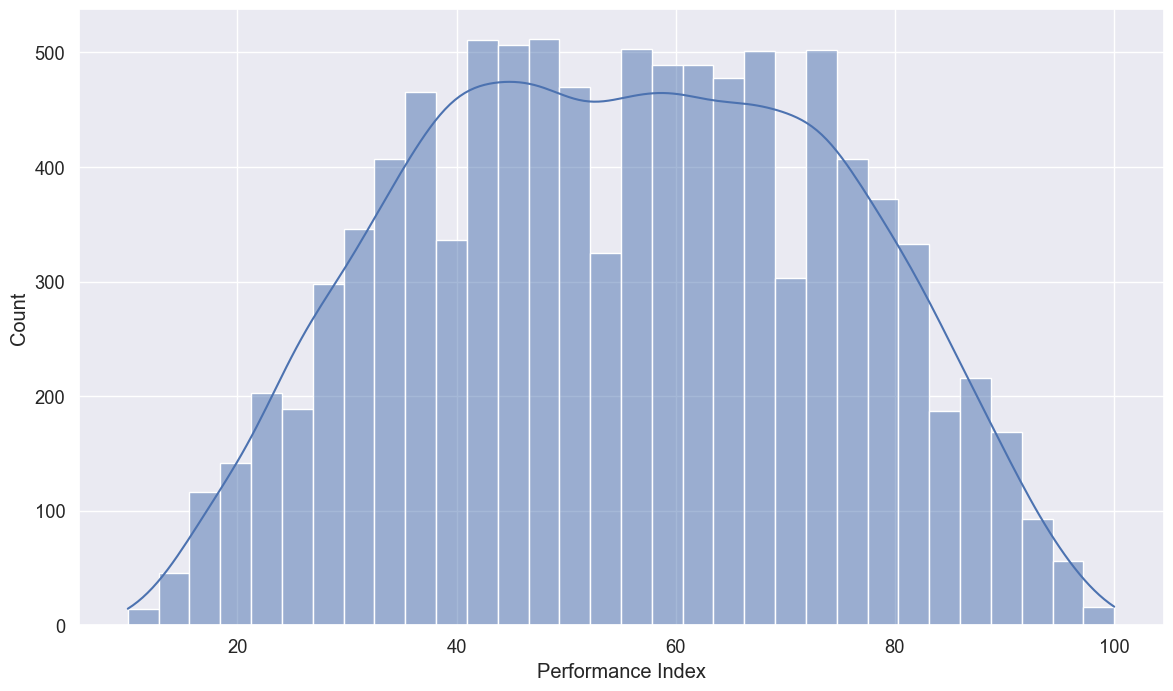

In [117]:
# Histograma da variável "Performance Index"

plt.figure(figsize=(14,8))
sns.histplot(data = df, x = 'Performance Index', kde = True)

--------------------------------------------------------------------------------------------------------------------------------
__Obs__: Nota-se a que a variável __"Performance Index"__, que é a variável target do modelo que ser quer contruir segue uma distribuição normal

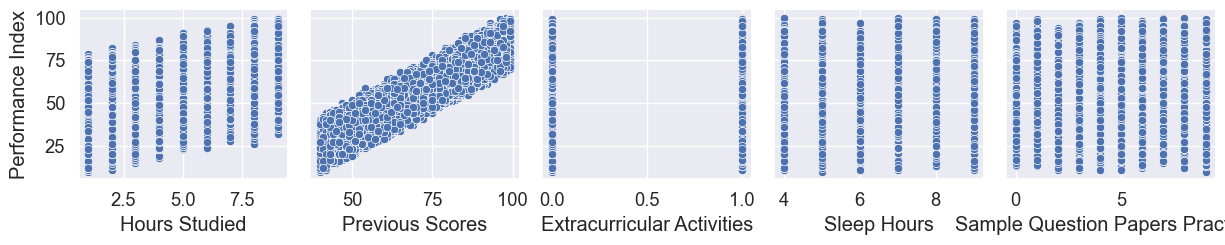

In [101]:
# Gráficos de dispersão das variáveis independentes perante a variável target

sns.pairplot(data = df, 
             x_vars = ["Hours Studied", 
                       "Previous Scores", 
                       "Extracurricular Activities", 
                       "Sleep Hours", 
                       "Sample Question Papers Practiced"],
             y_vars = "Performance Index")

--------------------------------------------------------------------------------------------------------------------------------
__Obs:__ Nota-se que a variável __"Previous Scores"__ possui uma forte correlação com a variável target. A variável __"Hours Studied"__ também possui uma correlação com a variável target, as demais variáveis possuem uma relação quase inexistente com a variável target

<Axes: >

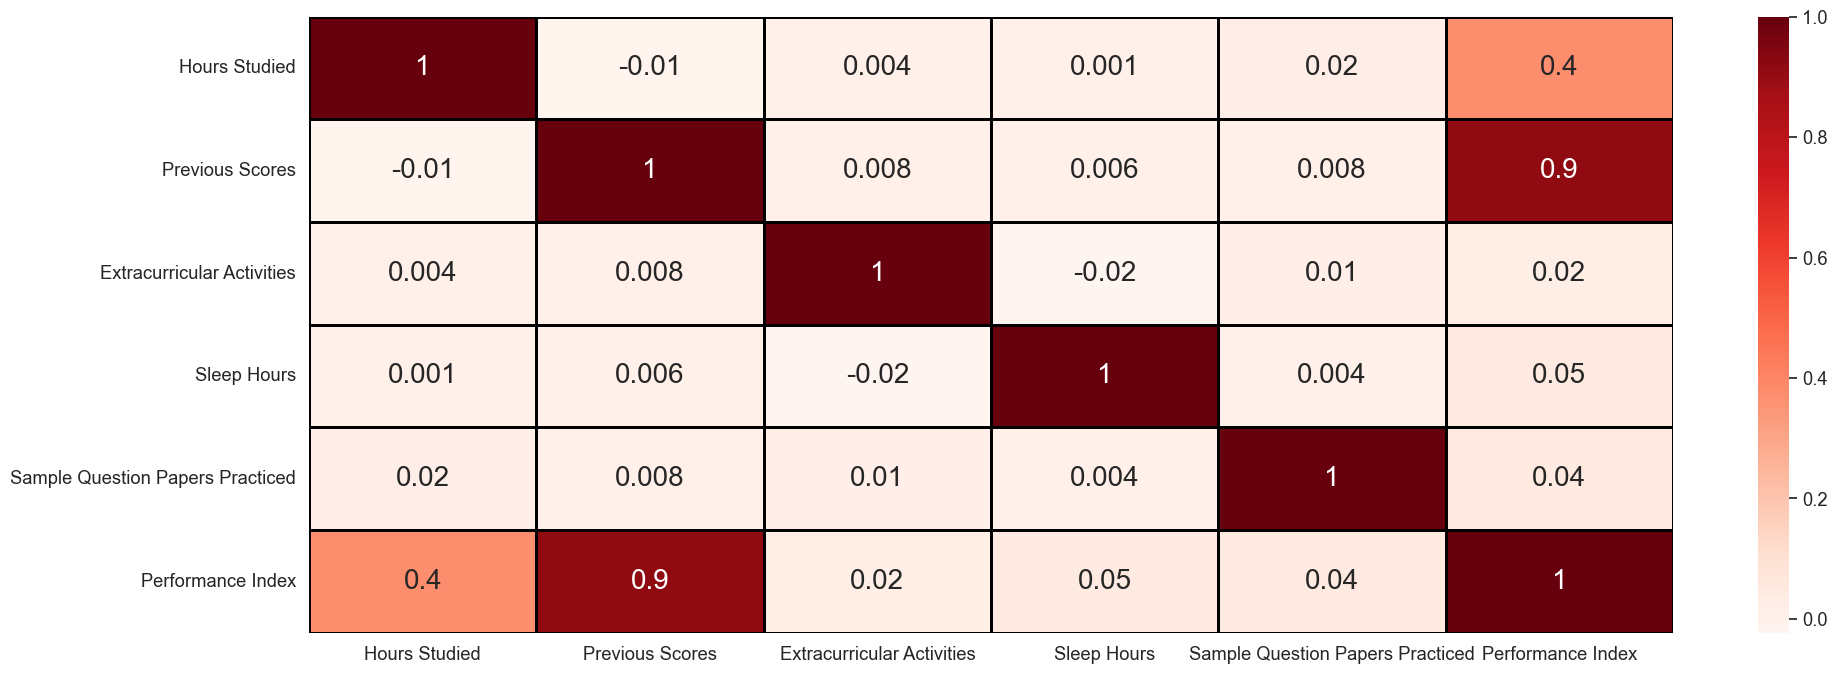

In [123]:
corr = df.corr()
plt.figure(figsize=(22,8))
sns.heatmap(data = corr, 
            annot=True, 
            annot_kws={'size': 20}, 
            fmt='.1g', 
            linewidth=1, 
            linecolor = "Black", 
            cmap="Reds")

--------------------------------------------------------------------------------------------------------------------------------
__Obs:__ Nota-se através de uma análise do mapa de calor que as variáveis __"Hours Studied"__ e __"Previous Scores"__ são as variáveis mais relevantes para a construção do modelo

In [102]:
# Separação das variáveis independentes escolhidas para o modelo em X e da variável target em y

X = df[['Hours Studied', 'Previous Scores']]
y = df["Performance Index"].values

In [103]:
# Variáveis independentes

X.head()

,Hours Studied,Previous Scores
0,7,99
1,4,82
2,8,51
3,5,52
4,7,75


In [104]:
# Variável Target

y

array([91., 65., 45., ..., 74., 95., 64.])

In [118]:
# Divisão dos dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
# Criação do modelo

modelo = linear_model.LinearRegression(fit_intercept = True)

In [121]:
# Padronização dos dados e treinamento do modelo

standardization = StandardScaler()
modelo = make_pipeline(standardization, modelo)
modelo.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [122]:
# Obtenção do R-Squad

r2 = r2_score(y_test, modelo.fit(X_train, y_train).predict(X_test))
print ('Coeficiente R2: %0.3f' % r2)

Coeficiente R2: 0.986
